In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
import data_import
import data_preprocessing
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [35]:
data=data_import.load_data()
data=data_preprocessing.data_preprocess(data)
data.head()

2025-11-12 18:31:24,446 - data_import - DEBUG - Data loaded from C:\MSML\SEM 1\ML\ML Projects\Project 2\Feature-Selection-and-Dimensionality-Reduction\data\pollution_dataset.csv
2025-11-12 18:31:24,451 - data_preprocess - DEBUG - Data Preprocessing completed


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,1
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,1
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,1
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0


In [36]:

X=data.drop(columns='Air Quality')
y=data['Air Quality']
print(X.shape)
print(y.shape)

(5000, 9)
(5000,)


In [37]:
y.head()

0    1
1    1
2    1
3    0
4    0
Name: Air Quality, dtype: int64

In [38]:
feature_names= np.array(X.columns.tolist())
feature_names

array(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density'],
      dtype='<U29')

In [ ]:
def univeriate(i):
    number_features=i
    #UNiveriate feature selection 
    selector=SelectKBest(chi2,k=number_features)   
    X_new = selector.fit_transform(X,y)
    X_new_features_mask = selector.get_support()
    X_new_feature_names = feature_names[X_new_features_mask]
    print('\nSelected', number_features, 'features using univariate feature selection:\n',X_new_feature_names)
    return X_new


In [63]:
def feature_imp_score(i):
      # Feature selection by importance score
    classifier=RandomForestClassifier(n_estimators=100,random_state=21)
    classifier.fit(X,y)
    feature_imp_scores=pd.DataFrame({'fea_imp_score': classifier.feature_importances_})
    feature_imp_scores['Features']=feature_names
    feature_imp_scores_sorted = feature_imp_scores.sort_values(by=feature_imp_scores.columns[0], ascending=False)
    top_k = feature_imp_scores_sorted['Features'].head(i).tolist()         # top k rows (names + scores)
    print('\nSelected :',i,'features using feature importance score:\n',top_k)
    #Visualise the feature importance score
    plt.figure(figsize=(8,5))
    plt.bar(feature_imp_scores_sorted["Features"], feature_imp_scores_sorted["fea_imp_score"])
    plt.xlabel("Features")
    plt.ylabel("Feature Importance Score")
    plt.title("Feature Importance Plot")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    model=SelectFromModel(classifier,prefit=True)
    X_new=model.transform(X)
    X_new_k=X_new[:i,:]
    return X_new
    


In [ ]:
def PCA(i):
    X = StandardScaler().fit_transform(X_)

    


Selected 1 features using univariate feature selection:
 ['Population_Density']

Selected : 1 features using feature importance score:
 ['CO']


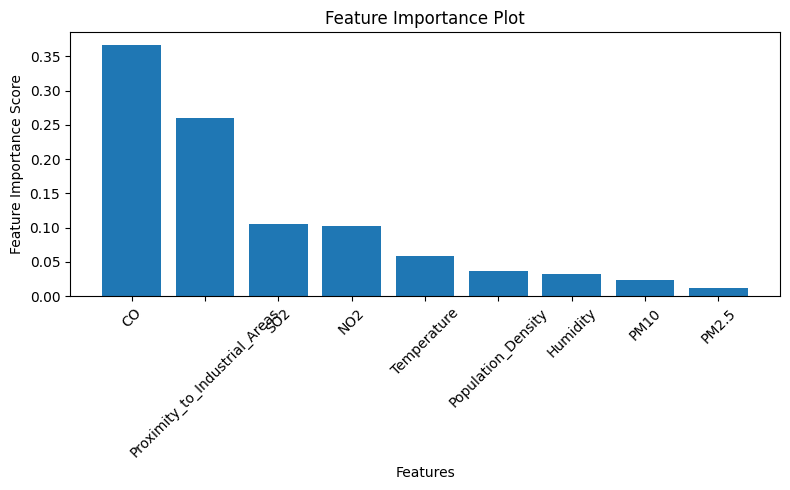


Selected 2 features using univariate feature selection:
 ['PM10' 'Population_Density']

Selected : 2 features using feature importance score:
 ['CO', 'Proximity_to_Industrial_Areas']


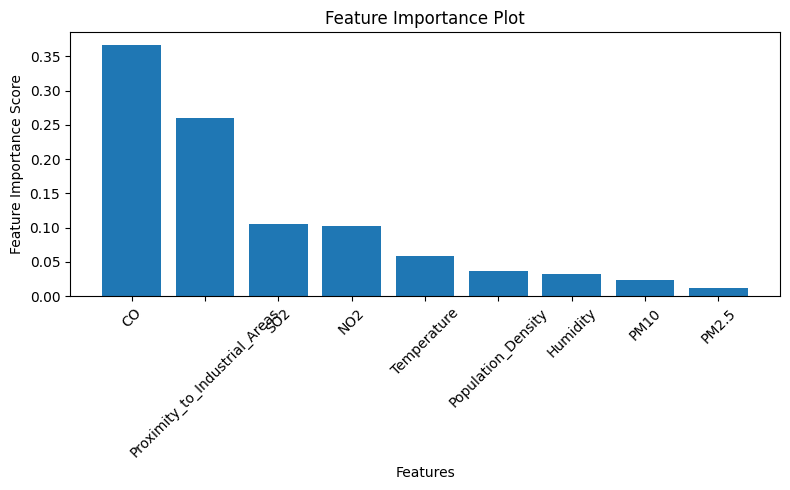


Selected 3 features using univariate feature selection:
 ['PM2.5' 'PM10' 'Population_Density']

Selected : 3 features using feature importance score:
 ['CO', 'Proximity_to_Industrial_Areas', 'SO2']


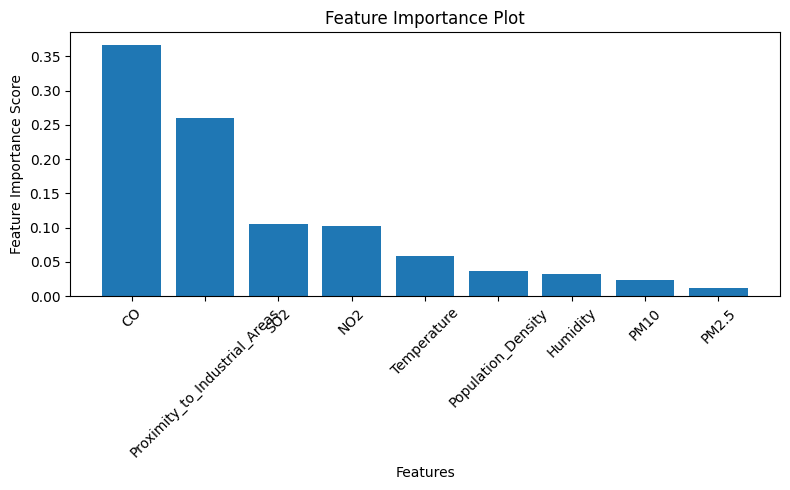

In [ ]:
K=[1,2,3]

for i in K:
    number_features=i
    #UNiveriate feature selection 
    selector=SelectKBest(chi2,k=number_features)   
    X_new = selector.fit_transform(X,y)
    X_new_features_mask = selector.get_support()
    X_new_feature_names = feature_names[X_new_features_mask]
    print('\nSelected', number_features, 'features using univariate feature selection:\n',X_new_feature_names)
    
  

    




dtype('<U29')

In [42]:
X_new_df=pd.DataFrame(X_new)
X_new_df.head()

,0,1,2
0,5.2,17.9,319.0
1,2.3,12.2,611.0
2,26.7,33.8,619.0
3,6.1,6.3,551.0
4,6.9,16.0,303.0
